1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2. Loading and Exploring Dataset

In [2]:
df = pd.read_csv('/content/Housing.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


3. Preprocessing The Dataset

In [3]:
df = df.dropna()

4. Splitting Dataset into Features and Target

In [5]:
X = df.drop('price', axis=1)
y = df['price']

5. Training Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Encoding Categorical Features

In [8]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

7. Training the Linear Regression Model (After Encoding)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

8. Predicting and Evaluating

In [10]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


9. Visualizing the Results

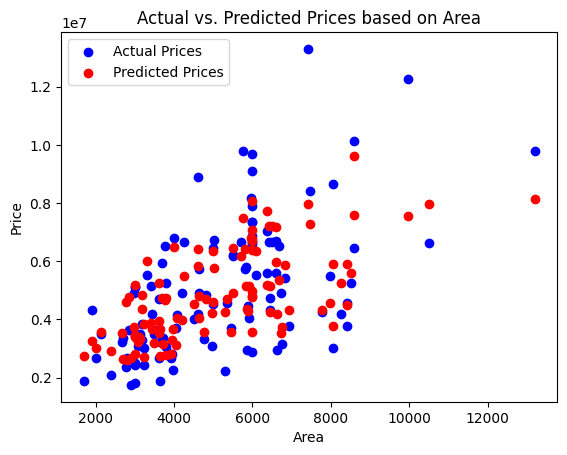

In [12]:
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Prices')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices based on Area')
plt.legend()
plt.show()